In [1]:
import h5py
from data_analysis_codes import param
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import LinData
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from data_analysis_codes.tools import GetVars_Plot2d as GVar

In [2]:
sim32 = param.pflrw_d3e2_L1821_t1_N32_LCDM()
sim64 = param.pflrw_d3e2_L1821_t1_N64_LCDM()
sim128 = param.pflrw_d3e2_L1821_t1_N128_LCDM()
it32 = np.arange(0, 12200, 100)
it64 = np.arange(0, 24300, 200)
it128 = np.arange(0, 48500, 400)
Lin32 = LinData.LinData_Class(sim32, '/home/robynm/simulations/'+sim32.sim_name+'/')
Lin64 = LinData.LinData_Class(sim64, '/home/robynm/simulations/'+sim64.sim_name+'/')
Lin128 = LinData.LinData_Class(sim128, '/home/robynm/simulations/'+sim128.sim_name+'/')

 read time file
 read time file
 read time file


In [3]:
FDorder = '6'

In [4]:
def est(data):
    return np.mean(data)

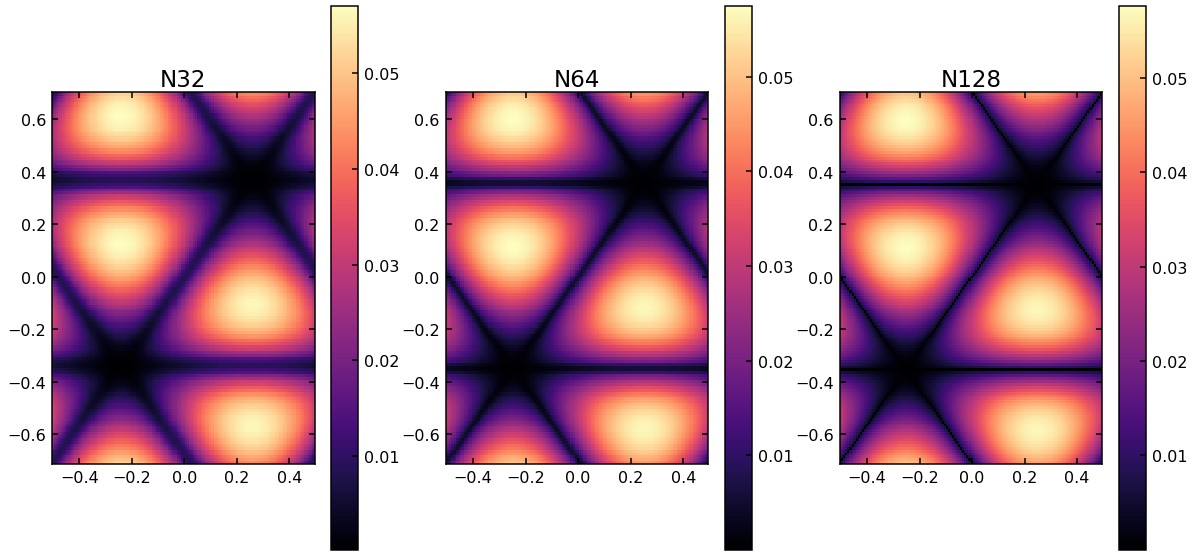

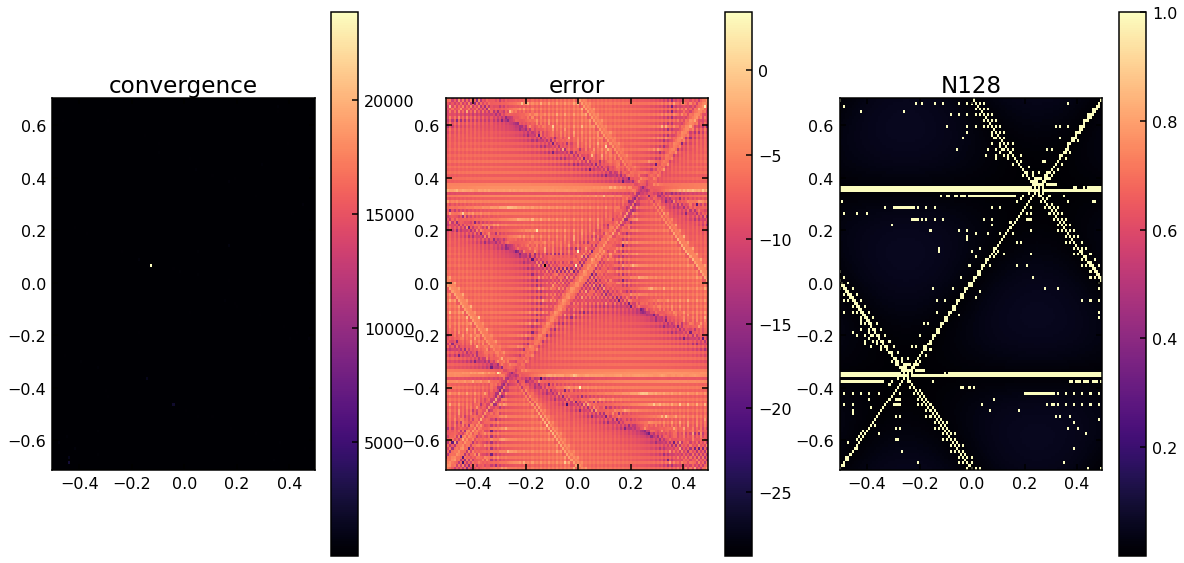

In [8]:
def interpolate(f):
    f_save = np.zeros((np.shape(f)[0]*2, np.shape(f)[1]*2))
    for i in range(np.shape(f)[0]):
        if i==np.shape(f)[0]-1:
            i = -1
        for j in range(np.shape(f)[1]):
            if j==np.shape(f)[0]-1:
                j = -1
            #print(i, j)
            f_save[i*2, j*2] = np.sum([f[i,j]*4/9, f[i-1,j]*2/9, f[i,j-1]*2/9, f[i-1,j-1]*1/9])
            f_save[i*2, j*2+1] = np.sum([f[i,j]*4/9, f[i-1,j]*2/9, f[i,j+1]*2/9, f[i-1,j+1]*1/9])
            f_save[i*2+1, j*2] = np.sum([f[i,j]*4/9, f[i+1,j]*2/9, f[i,j-1]*2/9, f[i+1,j-1]*1/9])
            f_save[i*2+1, j*2+1] = np.sum([f[i,j]*4/9, f[i+1,j]*2/9, f[i,j+1]*2/9, f[i+1,j+1]*1/9])
    return f_save

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_data(H, invar_dict):
    E2 = np.array(invar_dict['E2'])
    B2 = np.array(invar_dict['B2'])
    I = np.array(invar_dict['I']) #complex is noise
    J = np.array(invar_dict['J']) #complex is noise
    Scrit = I*I*I-27*J*J#complex is noise
    LS = np.array(invar_dict['LS'])
    K = np.array(invar_dict['K']) # not symmetric along edges
    N = np.array(invar_dict['N'])
    psi0 = np.array(invar_dict['psi0'])
    psi1 = np.array(invar_dict['psi1']) #pb
    psi2 = np.array(invar_dict['psi2'])
    psi3 = np.array(invar_dict['psi3']) #pb
    psi4 = np.array(invar_dict['psi4'])
    
    dE = abs(E2)**(1/2)
    dB = abs(B2)**(1/2)
    dEB = abs(E2 - B2)**(1/2)
    dI = I**(1/2)
    dJ = J**(1/3)
    dScrit = Scrit**(1/6)
    dLS = np.array(invar_dict['LS'])**(1/2)
    dK = np.array(invar_dict['K'])**(1/3)
    dN = np.array(invar_dict['N'])**(1/4)
    
    return abs(np.real(dScrit))/(H*H)

for it in [7]:
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = interpolate(interpolate(get_data(H, invar_dict32)))
    data64 = interpolate(get_data(H, invar_dict64))
    data128 = get_data(H, invar_dict128)
    
    convergence = abs(data32-data64)/abs(data64-data128)
    error = abs(data64-data128)/abs(convergence-1)
    #for i in range(np.shape(data128)[0]):
    #    for j in range(np.shape(data128)[1]):
    #        if error[i,j]>abs(data32[i,j]-data64[i,j]) or error[i,j]>abs(data64[i,j]-data128[i,j]):
    #            error[i,j] = np.max([abs(data32[i,j]-data64[i,j]), abs(data64[i,j]-data128[i,j])])
    
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data32, shading='nearest')
plt.gca().set_aspect("equal")
plt.title('N32')
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data64, shading='nearest')
plt.gca().set_aspect("equal")
plt.title('N64')
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data128, shading='nearest')
plt.gca().set_aspect("equal")
plt.title('N128')
plt.colorbar()

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, convergence, shading='nearest')
plt.gca().set_aspect("equal")
plt.title('convergence')
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, np.log(error), shading='nearest')
plt.gca().set_aspect("equal")
plt.title('error')
plt.colorbar()

data128_error = np.copy(data128)
data128_error[np.where(data128<error)] = 1
plt.subplot(133)
plt.pcolormesh(Lin128.d3xyz/sim128.L, Lin128.d3xyz*np.sqrt(2)/sim128.L, data128_error, shading='nearest')
plt.gca().set_aspect("equal")
plt.title('N128')
plt.colorbar()

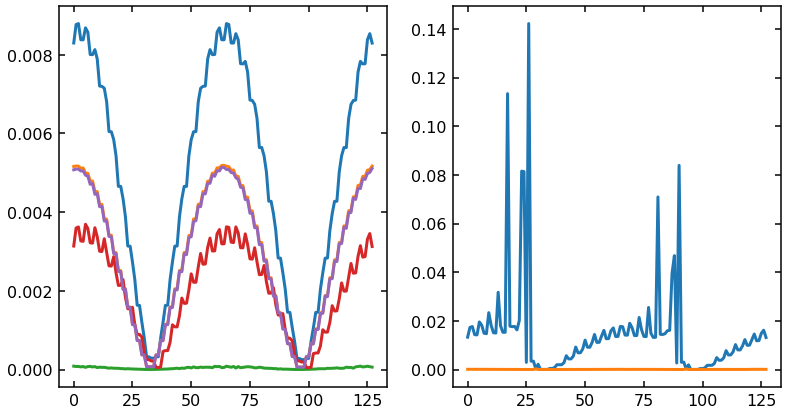

In [19]:
def diag(data):
    return [data[i,i] for i in range(len(data))]
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.plot(diag(data32))
plt.plot(diag(data64))
plt.plot(diag(data128))
plt.plot(diag(abs(data32-data64)))
plt.plot(diag(abs(data64-data128)))
convergence = abs(data32-data64)/abs(data64-data128)
error = abs(data64-data128)/abs(convergence-1)
for i in range(np.shape(data128)[0]):
    for j in range(np.shape(data128)[1]):
        if error[i,j]>abs(data32[i,j]-data64[i,j]) or error[i,j]>abs(data64[i,j]-data128[i,j]):
            error[i,j] = np.max([abs(data32[i,j]-data64[i,j]), abs(data64[i,j]-data128[i,j])])
#plt.plot(diag(error))
#
plt.subplot(132)
#plt.plot(diag(convergence))

error = abs(data64-data128)/abs(convergence-1)
plt.plot(diag(error))
for i in range(np.shape(data128)[0]):
    for j in range(np.shape(data128)[1]):
        if error[i,j]>abs(data32[i,j]-data64[i,j]) or error[i,j]>abs(data64[i,j]-data128[i,j]):
            error[i,j] = abs(data128[i,j])
plt.plot(diag(error))

#plt.plot(data32[32,:])
#plt.plot(data64[32,:])
#plt.plot(data128[32,:])
#plt.plot(error[32,:])

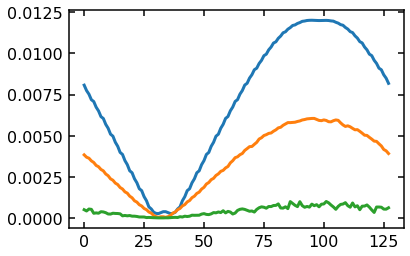

In [14]:
plt.plot(data32[32,:])
plt.plot(data64[32,:])
plt.plot(data128[32,:])

In [5]:
# I
Ir_error = []
Ir_conv = []
Ic_error = []
Ic_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = abs(np.real(np.array(invar_dict32['I'])**(1/2)))/(H**2)
    data64 = abs(np.real(np.array(invar_dict64['I'])**(1/2)))/(H**2)
    data128 = abs(np.real(np.array(invar_dict128['I'])**(1/2)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Ir_error += [est(error)]
    Ir_conv += [est(convergence)]
    
    data32 = abs(np.imag(np.array(invar_dict32['I'])**(1/2)))/(H**2)
    data64 = abs(np.imag(np.array(invar_dict64['I'])**(1/2)))/(H**2)
    data128 = abs(np.imag(np.array(invar_dict128['I'])**(1/2)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Ic_error += [est(error)]
    Ic_conv += [est(convergence)]

<ipython-input-5-d0b1b74c5bf2>:25: RuntimeWarning: divide by zero encountered in true_divide
  convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
<ipython-input-5-d0b1b74c5bf2>:25: RuntimeWarning: invalid value encountered in true_divide
  convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
<ipython-input-5-d0b1b74c5bf2>:26: RuntimeWarning: divide by zero encountered in true_divide
  error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)


In [6]:
# J
Jr_error = []
Jr_conv = []
Jc_error = []
Jc_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = abs(np.real(np.array(invar_dict32['J'])**(1/3)))/(H**2)
    data64 = abs(np.real(np.array(invar_dict64['J'])**(1/3)))/(H**2)
    data128 = abs(np.real(np.array(invar_dict128['J'])**(1/3)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Jr_error += [est(error)]
    Jr_conv += [est(convergence)]
    
    data32 = abs(np.imag(np.array(invar_dict32['J'])**(1/3)))/(H**2)
    data64 = abs(np.imag(np.array(invar_dict64['J'])**(1/3)))/(H**2)
    data128 = abs(np.imag(np.array(invar_dict128['J'])**(1/3)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Jc_error += [est(error)]
    Jc_conv += [est(convergence)]

<ipython-input-6-8bc36dab71c1>:26: RuntimeWarning: divide by zero encountered in true_divide
  error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)


In [7]:
# Scrit
Scritr_error = []
Scritr_conv = []
Scritc_error = []
Scritc_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    I = np.array(invar_dict32['I'])
    J = np.array(invar_dict32['J'])
    data32 = abs(np.real((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    I = np.array(invar_dict64['I'])
    J = np.array(invar_dict64['J'])
    data64 = abs(np.real((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    I = np.array(invar_dict128['I'])
    J = np.array(invar_dict128['J'])
    data128 = abs(np.real((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Scritr_error += [est(error)]
    Scritr_conv += [est(convergence)]
    
    I = np.array(invar_dict32['I'])
    J = np.array(invar_dict32['J'])
    data32 = abs(np.imag((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    I = np.array(invar_dict64['I'])
    J = np.array(invar_dict64['J'])
    data64 = abs(np.imag((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    I = np.array(invar_dict128['I'])
    J = np.array(invar_dict128['J'])
    data128 = abs(np.imag((I*I*I-27*J*J)**(1/6)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Scritc_error += [est(error)]
    Scritc_conv += [est(convergence)]

<ipython-input-7-25f52001284e>:25: RuntimeWarning: divide by zero encountered in true_divide
  error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
<ipython-input-7-25f52001284e>:42: RuntimeWarning: divide by zero encountered in true_divide
  error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)


In [8]:
# K
Kr_error = []
Kr_conv = []
Kc_error = []
Kc_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = abs(np.real(np.array(invar_dict32['K'])**(1/3)))/(H**2)
    data64 = abs(np.real(np.array(invar_dict64['K'])**(1/3)))/(H**2)
    data128 = abs(np.real(np.array(invar_dict128['K'])**(1/3)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Kr_error += [est(error)]
    Kr_conv += [est(convergence)]
    
    data32 = abs(np.imag(np.array(invar_dict32['K'])**(1/3)))/(H**2)
    data64 = abs(np.imag(np.array(invar_dict64['K'])**(1/3)))/(H**2)
    data128 = abs(np.imag(np.array(invar_dict128['K'])**(1/3)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Kc_error += [est(error)]
    Kc_conv += [est(convergence)]

In [9]:
# LS
LSr_error = []
LSr_conv = []
LSc_error = []
LSc_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = abs(np.real(np.array(invar_dict32['LS'])**(1/2)))/(H**2)
    data64 = abs(np.real(np.array(invar_dict64['LS'])**(1/2)))/(H**2)
    data128 = abs(np.real(np.array(invar_dict128['LS'])**(1/2)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    LSr_error += [est(error)]
    LSr_conv += [est(convergence)]
    
    data32 = abs(np.imag(np.array(invar_dict32['LS'])**(1/2)))/(H**2)
    data64 = abs(np.imag(np.array(invar_dict64['LS'])**(1/2)))/(H**2)
    data128 = abs(np.imag(np.array(invar_dict128['LS'])**(1/2)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    LSc_error += [est(error)]
    LSc_conv += [est(convergence)]

In [10]:
# N
Nr_error = []
Nr_conv = []
Nc_error = []
Nc_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = abs(np.real(np.array(invar_dict32['N'])**(1/4)))/(H**2)
    data64 = abs(np.real(np.array(invar_dict64['N'])**(1/4)))/(H**2)
    data128 = abs(np.real(np.array(invar_dict128['N'])**(1/4)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Nr_error += [est(error)]
    Nr_conv += [est(convergence)]
    
    data32 = abs(np.imag(np.array(invar_dict32['N'])**(1/4)))/(H**2)
    data64 = abs(np.imag(np.array(invar_dict64['N'])**(1/4)))/(H**2)
    data128 = abs(np.imag(np.array(invar_dict128['N'])**(1/4)))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    Nc_error += [est(error)]
    Nc_conv += [est(convergence)]

In [11]:
# E
E_error = []
E_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = (abs(np.array(invar_dict32['E2']))**(1/2))/(H**2)
    data64 = (abs(np.array(invar_dict64['E2']))**(1/2))/(H**2)
    data128 = (abs(np.array(invar_dict128['E2']))**(1/2))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    E_error += [est(error)]
    E_conv += [est(convergence)]

In [12]:
# B
B_error = []
B_conv = []
for it in range(len(it32)):
    H = Lin32.temp_from_temp('H', 'it', it32[it])
    invar_dict32 = h5py.File('/home/robynm/simulations/'+sim32.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it32[it]), 'r')
    invar_dict64 = h5py.File('/home/robynm/simulations/'+sim64.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it64[it]), 'r')
    invar_dict128 = h5py.File('/home/robynm/simulations/'+sim128.sim_name+'/output-0000/pflrw_L1821/invar_diag_FD'+FDorder+'/invar_diag_{:06d}.hdf5'.format(it128[it]), 'r')
    
    data32 = (abs(np.array(invar_dict32['B2']))**(1/2))/(H**2)
    data64 = (abs(np.array(invar_dict64['B2']))**(1/2))/(H**2)
    data128 = (abs(np.array(invar_dict128['B2']))**(1/2))/(H**2)
    
    convergence = abs(data32-data64[0::2,0::2])/abs(data64[0::2,0::2]-data128[0::4,0::4])
    error = abs(data64[0::2,0::2]-data128[0::4,0::4])/abs(convergence-1)
    B_error += [est(error)]
    B_conv += [est(convergence)]

Text(0.5, 1.0, 'Error')

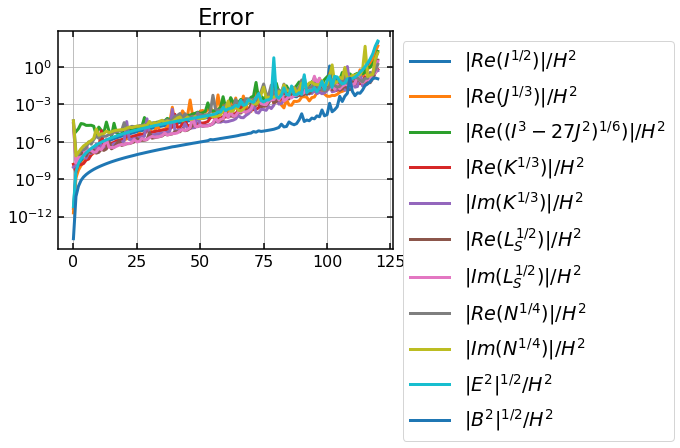

In [13]:
plt.semilogy(Ir_error, label=r'$|Re(I^{1/2})|/H^2$')
#plt.semilogy(Ic_error, label=r'$|Im(I^{1/2})|/H^2$')
plt.semilogy(Jr_error, label=r'$|Re(J^{1/3})|/H^2$')
#plt.semilogy(Jc_error, label=r'$|Im(J^{1/3})|/H^2$')
plt.semilogy(Scritr_error, label=r'$|Re((I^3-27 J^2)^{1/6})|/H^2$')
#plt.semilogy(Scritc_error, label=r'$|Im((I^3-27 J^2)^{1/6})|/H^2$')
plt.semilogy(Kr_error, label=r'$|Re(K^{1/3})|/H^2$')
plt.semilogy(Kc_error, label=r'$|Im(K^{1/3})|/H^2$')
plt.semilogy(LSr_error, label=r'$|Re(L_{S}^{1/2})|/H^2$')
plt.semilogy(LSc_error, label=r'$|Im(L_{S}^{1/2})|/H^2$')
plt.semilogy(Nr_error, label=r'$|Re(N^{1/4})|/H^2$')
plt.semilogy(Nc_error, label=r'$|Im(N^{1/4})|/H^2$')
plt.semilogy(E_error, label=r'$|E^2|^{1/2}/H^2$')
plt.semilogy(B_error, label=r'$|B^2|^{1/2}/H^2$')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.title('Error')

Text(0.5, 1.0, 'Convergence')

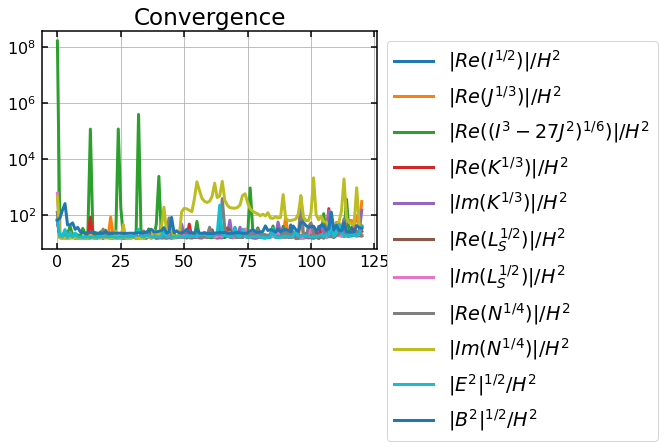

In [14]:
plt.plot(Ir_conv, label=r'$|Re(I^{1/2})|/H^2$')
#plt.semilogy(Ic_conv, label=r'$|Im(I^{1/2})|/H^2$')
plt.semilogy(Jr_conv, label=r'$|Re(J^{1/3})|/H^2$')
#plt.semilogy(Jc_conv, label=r'$|Im(J^{1/3})|/H^2$')
plt.semilogy(Scritr_conv, label=r'$|Re((I^3-27 J^2)^{1/6})|/H^2$')
#plt.semilogy(Scritc_conv, label=r'$|Im((I^3-27 J^2)^{1/6})|/H^2$')
plt.semilogy(Kr_conv, label=r'$|Re(K^{1/3})|/H^2$')
plt.semilogy(Kc_conv, label=r'$|Im(K^{1/3})|/H^2$')
plt.semilogy(LSr_conv, label=r'$|Re(L_{S}^{1/2})|/H^2$')
plt.semilogy(LSc_conv, label=r'$|Im(L_{S}^{1/2})|/H^2$')
plt.semilogy(Nr_conv, label=r'$|Re(N^{1/4})|/H^2$')
plt.semilogy(Nc_conv, label=r'$|Im(N^{1/4})|/H^2$')
plt.semilogy(E_conv, label=r'$|E^2|^{1/2}/H^2$')
plt.semilogy(B_conv, label=r'$|B^2|^{1/2}/H^2$')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.title('Convergence')